In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.nn as nn
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import torchvision as tv
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#creating transformation to normalize data and convert it to tensor data
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
    ])

In [3]:
#downloading FashionMNIST train and test data 
train_data = datasets.FashionMNIST('data', train=True,download=True, transform=transform)
test_data = datasets.FashionMNIST('data', train=False,download=True, transform=transform)

In [4]:
#class labels of the dataset FashionMNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#calculating the size of training and validation data 
SizeOfTrain = len(train_data)
SizeOfValidation = ((SizeOfTrain * 10) // 100)
SizeOfTrain = SizeOfTrain - SizeOfValidation
print(SizeOfTrain,SizeOfValidation) 

54000 6000


In [6]:
#splittng train dataset into train and validation data
train_data, validation_data = random_split(train_data, [SizeOfTrain, SizeOfValidation])

In [7]:
#loading datasets

#dataloader for trainging data
train_loader = DataLoader(train_data, batch_size=64,shuffle=True,)

#dataloader for trainging data
test_loader = DataLoader(test_data, batch_size=64,shuffle=True,)

#dataloader for validation data
val_loader = DataLoader(validation_data ,batch_size=64 ,shuffle=False,)

In [8]:
dataiter = iter(train_loader)
imgs, lbls = dataiter.next()

In [9]:
def imshow(img,lbl):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()   # convert from tensor
    plt.imshow(np.transpose(npimg, (1, 2, 0)) , cmap="Greys") 
    plt.title(lbl)
    plt.show()

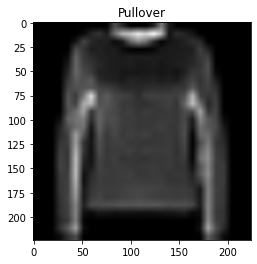

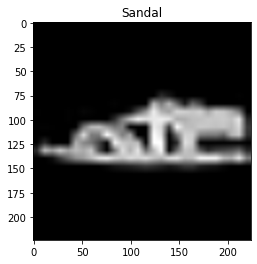

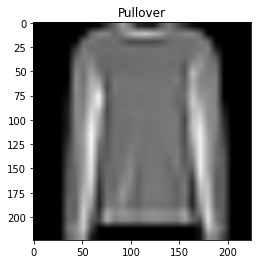

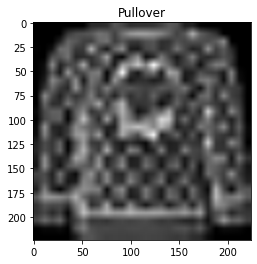

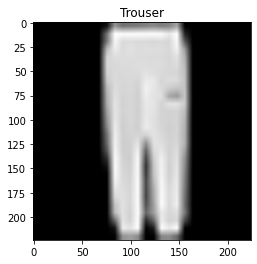

In [10]:
for i in range(5):
    n = lbls[i].numpy()
    img_lbl = classes[n]
    imshow(tv.utils.make_grid(imgs[i]),img_lbl)

In [11]:
#checking if we have gpu and running the model on gpu else on cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(25088, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [13]:
#defining the num of calsses as 10 because FashionMNIST has 10 classes 
num_classes = 10

In [14]:
model = VGG16(num_classes)
model.to(device)

VGG16(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer6): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer7): Seq

In [15]:
#defining the batch size
batch_size = 64
#defing our learning rate 
learning_rate = 0.0001
#defining the no of epochs we need to run
num_epochs = 15
#defining loss fuction
loss_fn = nn.CrossEntropyLoss()
#defining adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate ,weight_decay = 0.001)
# used for gradient scailing, prevents small gradients from vanishing or hitting 0
scaler = torch.cuda.amp.GradScaler()

In [16]:
total_epochs = [*range(15)]
train_loss_per_epoch = []
validation_loss_per_epoch = []
# Training the model
for epoch in range(num_epochs):
    print("EPOCH: {}/{}".format(epoch + 1, num_epochs))
    model.train()
    
    training_loss = 0.0
    validation_loss = 0.0
    
    val_correct = 0
    train_correct = 0
    
#Load the dataset using the train loader we defined earlier 
    for i, (images, labels) in enumerate(train_loader):  
        # convert data into tensors based on device (gpu or cpu)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        training_loss += loss.item()*(len(train_loader))
        train_correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
        
    training_loss = training_loss/len(train_loader.dataset)
    train_loss_per_epoch.append(training_loss)
    train_correct = train_correct / SizeOfTrain
    print("Training loss: {:.4f}, Training accuracy: {:.4f}\n".format(training_loss, train_correct))
    
    
    with torch.no_grad():
        model.eval()
        for (img, lbl) in val_loader:
            (img, lbl) = (img.to(device), lbl.to(device))
            pred = model(img)
            validation_loss += loss_fn(pred, lbl)
            val_correct += (pred.argmax(1) == lbl).type(torch.float).sum().item()
    
    validation_loss = validation_loss / SizeOfValidation
    validation_loss_per_epoch.append(validation_loss)
    val_correct = val_correct / SizeOfValidation
    print("Validation loss: {:.4f}, Validation accuracy: {:.4f}\n".format(validation_loss, val_correct))

EPOCH: 1/15
Training loss: 7.7271, Training accuracy: 0.7793

Validation loss: 0.0092, Validation accuracy: 0.8350

EPOCH: 2/15
Training loss: 4.1595, Training accuracy: 0.8821

Validation loss: 0.0048, Validation accuracy: 0.8873

EPOCH: 3/15
Training loss: 3.6488, Training accuracy: 0.8993

Validation loss: 0.0041, Validation accuracy: 0.9055

EPOCH: 4/15
Training loss: 3.3135, Training accuracy: 0.9063

Validation loss: 0.0043, Validation accuracy: 0.9052

EPOCH: 5/15
Training loss: 3.0876, Training accuracy: 0.9142

Validation loss: 0.0039, Validation accuracy: 0.9150

EPOCH: 6/15
Training loss: 2.9275, Training accuracy: 0.9186

Validation loss: 0.0037, Validation accuracy: 0.9122

EPOCH: 7/15
Training loss: 2.8092, Training accuracy: 0.9224

Validation loss: 0.0037, Validation accuracy: 0.9130

EPOCH: 8/15
Training loss: 2.6676, Training accuracy: 0.9264

Validation loss: 0.0034, Validation accuracy: 0.9245

EPOCH: 9/15
Training loss: 2.5188, Training accuracy: 0.9295

Validation

In [17]:
print("Accuracy of the model is = ", val_correct * 100)

Accuracy of the model is =  92.66666666666666


In [18]:
val_array = []
for i in validation_loss_per_epoch:
    val_array.append(i.cpu().data.numpy())

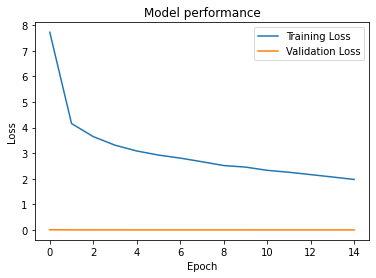

In [19]:
plt.plot(total_epochs, train_loss_per_epoch, label = "Training Loss")
plt.plot(total_epochs, val_array, label = "Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model performance")
plt.show()

In [21]:
Grount_truth = []
Predicted_label = []
with torch.no_grad():
    # loop over the test set
    for (image, label) in test_loader:
        Ground_label = label.numpy()[0]
        Grount_truth.append(Ground_label)
        # send the input to the device and make predictions on it
        image = image.to(device)
        pred = model(image)
        # find the class label index with the largest corresponding probability
        pred_label = pred.argmax(axis=1).cpu().numpy()[0]
        Predicted_label.append(pred_label)

In [22]:
print(classification_report(Grount_truth,Predicted_label,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.85      0.81        13
     Trouser       1.00      1.00      1.00        18
    Pullover       0.90      0.95      0.92        19
       Dress       1.00      0.93      0.97        15
        Coat       0.92      0.92      0.92        12
      Sandal       0.93      1.00      0.96        13
       Shirt       0.78      0.74      0.76        19
     Sneaker       1.00      1.00      1.00         9
         Bag       1.00      1.00      1.00        21
  Ankle boot       1.00      0.94      0.97        18

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



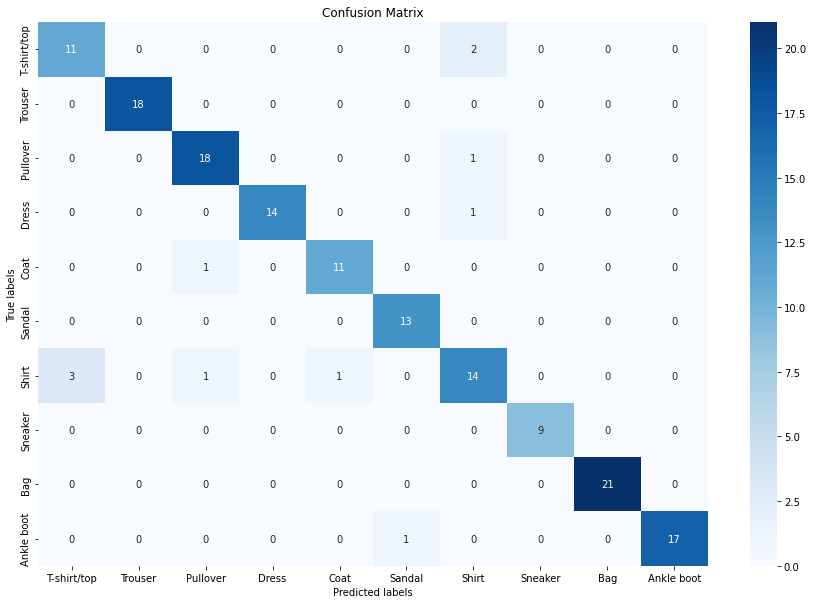

In [23]:
cm = confusion_matrix(Grount_truth,Predicted_label)
fig , ax= plt.subplots(figsize=(15, 10))
sns.heatmap(cm, cmap=plt.cm.Blues,annot = True,ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
plt.show()

In [44]:
dataiter = iter(test_loader)
imgs, lbls = dataiter.next()

In [45]:
def imshow_pred(img,lbl_true,lbl_pred):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()   # convert from tensor
    print("Image true label is:", lbl_true)
    print("Image predicted label is:", lbl_pred)
    plt.imshow(np.transpose(npimg, (1, 2, 0)) , cmap="Greys") 
#     plt.title(lbl)
    plt.show()

Image true label is: Pullover
Image predicted label is: Pullover


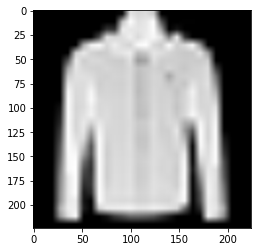

In [46]:
for (image, label) in test_loader:
        n = label.numpy()[0]
        img_lbl_true = classes[n]
        image = image.to(device)
        pred = model(image)
        pred_label = pred.argmax(axis=1).cpu().numpy()[0]
        img_lbl_pred = classes[pred_label]
        imshow_pred(tv.utils.make_grid(imgs[i]),img_lbl_true,img_lbl_pred)
        break